Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83


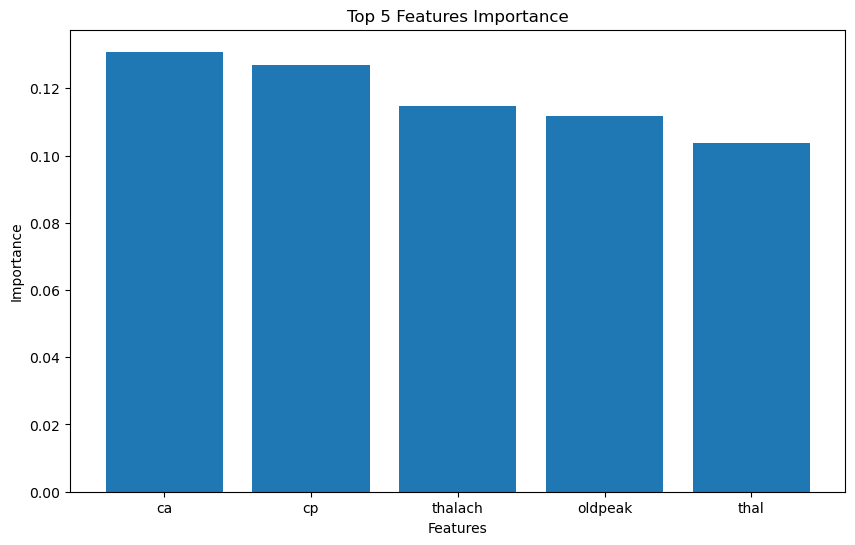

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model - Accuracy: 0.84, Precision: 0.83, Recall: 0.88, F1 Score: 0.85


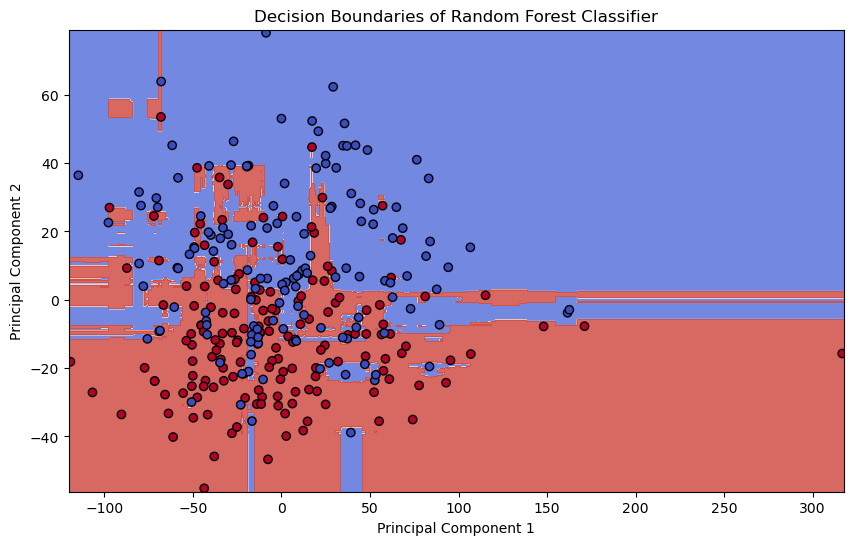

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
df = pd.read_csv(url)

# Q1: Preprocess the dataset
# Handle missing values (if any)
df.dropna(inplace=True)

# Encode categorical variables (if any)
# In this dataset, 'sex' is a binary categorical variable (0 or 1)
# You can use pd.get_dummies() for more complex cases
df['sex'] = df['sex'].astype('category').cat.codes

# Scale numerical features (if necessary)
# In this case, we don't need scaling as random forests are not sensitive to feature scale

# Q2: Split the dataset
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Q3: Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Q4: Evaluate the performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Q5: Feature importance
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(top5_features['Feature'], top5_features['Importance'])
plt.title('Top 5 Features Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Q6: Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Q7: Report the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Best Hyperparameters:", best_params)
print(f"Tuned Model - Accuracy: {accuracy_tuned:.2f}, Precision: {precision_tuned:.2f}, Recall: {recall_tuned:.2f}, F1 Score: {f1_tuned:.2f}")

# Q8: Decision boundaries visualization
# (Note: This part can be complex for datasets with many features, consider using dimensionality reduction techniques)
# For simplicity, let's plot decision boundaries for the top 2 features
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train the model on the reduced dataset
rf_classifier.fit(X_reduced, y)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
h = 0.2
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()